### Gatering and loading Data

In [371]:
import requests
import numpy as np
import os
import pandas as pd
import tweepy
from tweepy import OAuthHandler
import json
from timeit import default_timer as timer


In [372]:
# to plot the graph
import matplotlib.pyplot as plt                                     
plt.rc("font", size=14)
%matplotlib inline                                                  
from matplotlib import cm as cm

In [373]:
# for using and plotting intractve graphs
import seaborn as sns                                                
sns.set(style="whitegrid", color_codes=True)

In [374]:
import warnings
warnings.filterwarnings('ignore')

In [4]:
archive_df = pd.read_csv('twitter-archive-enhanced.csv', encoding='utf-8')
archive_df.head(4)

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,None,None,None,None
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,None,None,None,None
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,None,None,None,None
3,891689557279858688,NaN,NaN,2017-07-30 15:58:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,None,None,None,None


In [5]:
archive_df.shape

(2356, 17)

In [6]:
archive_df.tweet_id.duplicated().sum()

0

In [7]:
url = 'https://d17h27t6h515a5.cloudfront.net/topher/2017/August/599fd2ad_image-predictions/image-predictions.tsv'
response = requests.get(url)

folder_name = 'image-predictions'
if not os.path.exists(folder_name):
    os.makedirs(folder_name)
    
with open(os.path.join(folder_name, url.split('/')[-1]), mode='wb') as file:
    file.write(response.content)
    

In [8]:
os.listdir(folder_name)

['image-predictions.tsv']

In [9]:
image_predictions_df = pd.read_csv(folder_name + '/image-predictions.tsv', sep='\t')
image_predictions_df.head(4)

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh_springer_spaniel,0.465074,True,collie,0.156665,True,Shetland_sheepdog,0.061428,True
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone,0.506826,True,miniature_pinscher,0.074192,True,Rhodesian_ridgeback,0.072010,True
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,German_shepherd,0.596461,True,malinois,0.138584,True,bloodhound,0.116197,True
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1,Rhodesian_ridgeback,0.408143,True,redbone,0.360687,True,miniature_pinscher,0.222752,True


In [10]:
image_predictions_df.tweet_id.duplicated().sum()

0

* I am not supposed to share the key and secret details

In [11]:
import tweepy

consumer_key = 'mh14Cv8iQaacewNPowXoNhcsg'
consumer_secret = '3ALLunwU8xOBKEDaLLYUXD8s5cMbw7CCooEnYEh85QOA1fmOBg'
access_token = '4208747360-lfgdZaY2zbfBdt7r3i14hkJ4GWZ3se6jNGxcD7h'
access_secret = 'BvjEDpAvApaPoXInJmlQuXBC5mOOWbXw3Sm3VOdVKpdCv'

auth = tweepy.OAuthHandler(consumer_key, consumer_secret)
auth.set_access_token(access_token, access_secret)

api = tweepy.API(auth, wait_on_rate_limit = True, wait_on_rate_limit_notify = True)

### Retweet count and favorite count data

In [124]:
data = []
with open('tweet_json.txt', 'r') as readfile: 
    tweet_json = readfile.readline()
    while tweet_json:
        tweet_dict = json.loads(tweet_json)
        data.append(tweet_dict)
        tweet_json = readfile.readline()
        
tweet_api_data = pd.DataFrame.from_dict(data)

In [125]:
api

#### Assess

In [126]:
tweet_api_data

892420643555336193  \
0  {'created_at': 'Tue Aug 01 16:23:56 +0000 2017', 'id': 892420643555336193, 'id_str': '892420643555336193', 'full_text': 'This is Phineas. He's a mystical boy. Only ever appears in the hole of a donut. 13/10 https://t.co/MgUWQ76dJU', 'truncated': False, 'display_text_range': [0, 85], 'entities': {'hashtags': [], 'symbols': [], 'user_mentions': [], 'urls': [], 'media': [{'id': 892420639486877696, 'id_str': '892420639486877696', 'indices': [86, 109], 'media_url': 'http://pbs.twimg.com/media/DGKD1-bXoAAIAUK.jpg', 'media_url_https': 'https://pbs.twimg.com/media/DGKD1-bXoAAIAUK.jpg', 'url': 'https://t.co/MgUWQ76dJU', 'display_url': 'pic.twitter.com/MgUWQ76dJU', 'expanded_url': 'https://twitter.com/dog_rates/status/892420643555336193/photo/1', 'type': 'photo', 'sizes': {'thumb': {'w': 150, 'h': 150, 'resize': 'crop'}, 'medium': {'w': 540, 'h': 528, 'resize': 'fit'}, 'small': {'w': 540, 'h': 528, 'resize': 'fit'}, 'large': {'w': 540, 'h': 528, 'resize': 'fit'}}}]}, 'extended_entities': {'media': [{'id': 892420639486877696, 'id_str': '892420639486877696', 'indices': [86, 109], 'media_url': 'http://pbs.twimg.com/media/DGKD1-bXoAAIAUK.jpg', 'media_url_https': 'https://pbs.twimg.com/media/DGKD1-bXoAAIAUK.jpg', 'url': 'https://t.co/MgUWQ76dJU', 'display_url': 'pic.twitter.com/MgUWQ76dJU', 'expanded_url': 'https://twitter.com/dog_rates/status/892420643555336193/photo/1', 'type': 'photo', 'sizes': {'thumb': {'w': 150, 'h': 150, 'resize': 'crop'}, 'medium': {'w': 540, 'h': 528, 'resize': 'fit'}, 'small': {'w': 540, 'h': 528, 'resize': 'fit'}, 'large': {'w': 540, 'h': 528, 'resize': 'fit'}}}]}, 'source': '<a href="http://twitter.com/download/iphone" rel="nofollow">Twitter for iPhone</a>', 'in_reply_to_status_id': None, 'in_reply_to_status_id_str': None, 'in_reply_to_user_id': None, 'in_reply_to_user_id_str': None, 'in_reply_to_screen_name': None, 'user': {'id': 4196983835, 'id_str': '4196983835', 'name': 'WeRateDogs®', 'screen_name': 'dog_rates', 'location': '「 DM YOUR DOGS 」', 'description': 'Your Only Source For Professional Dog Ratings Instagram and Facebook ➪ WeRateDogs partnerships@weratedogs.com ⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀', 'url': 'https://t.co/N7sNNHAEXS', 'entities': {'url': {'urls': [{'url': 'https://t.co/N7sNNHAEXS', 'expanded_url': 'http://weratedogs.com', 'display_url': 'weratedogs.com', 'indices': [0, 23]}]}, 'description': {'urls': []}}, 'protected': False, 'followers_count': 8776413, 'friends_count': 15, 'listed_count': 5798, 'created_at': 'Sun Nov 15 21:41:29 +0000 2015', 'favourites_count': 146042, 'utc_offset': None, 'time_zone': None, 'geo_enabled': True, 'verified': True, 'statuses_count': 12151, 'lang': None, 'contributors_enabled': False, 'is_translator': False, 'is_translation_enabled': False, 'profile_background_color': '000000', 'profile_background_image_url': 'http://abs.twimg.com/images/themes/theme1/bg.png', 'profile_background_image_url_https': 'https://abs.twimg.com/images/themes/theme1/bg.png', 'profile_background_tile': False, 'profile_image_url': 'http://pbs.twimg.com/profile_images/1218319284557905920/ntuD-LOA_normal.jpg', 'profile_image_url_https': 'https://pbs.twimg.com/profile_images/1218319284557905920/ntuD-LOA_normal.jpg', 'profile_banner_url': 'https://pbs.twimg.com/profile_banners/4196983835/1586206146', 'profile_link_color': 'F5ABB5', 'profile_sidebar_border_color': '000000', 'profile_sidebar_fill_color': '000000', 'profile_text_color': '000000', 'profile_use_background_image': False, 'has_extended_profile': False, 'default_profile': False, 'default_profile_image': False, 'following': False, 'follow_request_sent': False, 'notifications': False, 'translator_type': 'none'}, 'geo': None, 'coordinates': None, 'place': None, 'contributors': None, 'is_quote_status': False, 'retweet_count': 7723, 'favorite_count': 36280, 'favorited': False, 'retweeted': False, 'possibly_sensitive': False, 'possibly_sensitive_appealable': False, 'lang': 'en'}   

                                                     

In [127]:
tweet_api_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1 entries, 0 to 0
Columns: 2331 entries, 892420643555336193 to 666020888022790149
dtypes: object(2331)
memory usage: 18.3+ KB


In [144]:
import requests
from io import BytesIO

In [145]:
data = requests.get('https://d17h27t6h515a5.cloudfront.net/topher/2017/August/599fd2ad_image-predictions/image-predictions.tsv')

In [146]:
image_predictions = pd.read_csv(BytesIO(data.content), sep = '\t')

In [147]:
image_predictions.to_csv('image-predictions.tsv', sep='\t', )

In [148]:
image_predictions

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh_springer_spaniel,0.465074,True,collie,0.156665,True,Shetland_sheepdog,0.061428,True
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone,0.506826,True,miniature_pinscher,0.074192,True,Rhodesian_ridgeback,0.072010,True
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,German_shepherd,0.596461,True,malinois,0.138584,True,bloodhound,0.116197,True
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1,Rhodesian_ridgeback,0.408143,True,redbone,0.360687,True,miniature_pinscher,0.222752,True
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,1,miniature_pinscher,0.560311,True,Rottweiler,0.243682,True,Doberman,0.154629,True
...,...,...,...,...,...,...,...,...,...,...,...,...
2070,891327558926688256,https://pbs.twimg.com/media/DF6hr6BUMAAzZgT.jpg,2,basset,0.555712,True,English_springer,0.225770,True,German_short-haired_pointer,0.175219,True
2071,891689557279858688,https://pbs.twimg.com/media/DF_q7IAWsAEuuN8.jpg,1,paper_towel,0.170278,False,Labrador_retriever,0.168086,True,spatula,0.040836,False
2072,891815181378084864,https://pbs.twimg.com/media/DGBdLU1WsAANxJ9.jpg,1,Chihuahua,0.716012,True,malamute,0.078253,True,kelpie,0.031379,True
2073,892177421306343426,https://pbs.twimg.com/media/DGGmoV4XsAAUL6n.jpg,1,Chihuahua,0.323581,True,Pekinese,0.090647,True,papillon,0.068957,True


In [149]:
image_predictions.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2075 entries, 0 to 2074
Data columns (total 12 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   tweet_id  2075 non-null   int64  
 1   jpg_url   2075 non-null   object 
 2   img_num   2075 non-null   int64  
 3   p1        2075 non-null   object 
 4   p1_conf   2075 non-null   float64
 5   p1_dog    2075 non-null   bool   
 6   p2        2075 non-null   object 
 7   p2_conf   2075 non-null   float64
 8   p2_dog    2075 non-null   bool   
 9   p3        2075 non-null   object 
 10  p3_conf   2075 non-null   float64
 11  p3_dog    2075 non-null   bool   
dtypes: bool(3), float64(3), int64(2), object(4)
memory usage: 152.1+ KB


In [150]:
image_predictions.describe()

,tweet_id,img_num,p1_conf,p2_conf,p3_conf
count,2.075000e+03,2075.000000,2075.000000,2.075000e+03,2.075000e+03
mean,7.384514e+17,1.203855,0.594548,1.345886e-01,6.032417e-02
std,6.785203e+16,0.561875,0.271174,1.006657e-01,5.090593e-02
min,6.660209e+17,1.000000,0.044333,1.011300e-08,1.740170e-10
25%,6.764835e+17,1.000000,0.364412,5.388625e-02,1.622240e-02
50%,7.119988e+17,1.000000,0.588230,1.181810e-01,4.944380e-02
75%,7.932034e+17,1.000000,0.843855,1.955655e-01,9.180755e-02
max,8.924206e+17,4.000000,1.000000,4.880140e-01,2.734190e-01


In [151]:
image_predictions.duplicated(subset=['tweet_id']).any()

False

In [152]:

image_predictions.duplicated(subset=['jpg_url']).any()

True

In [154]:
# Accesing the data and storing it
twitter_archives = pd.read_csv('twitter-archive-enhanced.csv')

In [155]:
twitter_archives

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is Phineas. He's a mystical boy. Only ever appears in the hole of a donut. 13/10 https://t.co/MgUWQ76dJU,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643555336193/photo/1,13,10,Phineas,None,None,None,None
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>","This is Tilly. She's just checking pup on you. Hopes you're doing ok. If not, she's available for pats, snugs, boops, the whole bit. 13/10 https://t.co/0Xxu71qeIV",NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421306343426/photo/1,13,10,Tilly,None,None,None,None
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is Archie. He is a rare Norwegian Pouncing Corgo. Lives in the tall grass. You never know when one may strike. 12/10 https://t.co/wUnZnhtVJB,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181378084864/photo/1,12,10,Archie,None,None,None,None
3,891689557279858688,NaN,NaN,2017-07-30 15:58:51 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is Darla. She commenced a snooze mid meal. 13/10 happens to the best of us https://t.co/tD36da7qLQ,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891689557279858688/photo/1,13,10,Darla,None,None,None,None
4,891327558926688256,NaN,NaN,2017-07-29 16:00:24 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>","This is Franklin. He would like you to stop calling him ""cute."" He is a very fierce shark and should be respected as such. 12/10 #BarkWeek https://t.co/AtUZn91f7f",NaN,NaN,NaN,"https://twitter.com/dog_rates/status/891327558926688256/photo/1,https://twitter.com/dog_rates/status/891327558926688256/photo/1",12,10,Franklin,None,None,None,None
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2351,666049248165822465,NaN,NaN,2015-11-16 00:24:50 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",Here we have a 1949 1st generation vulpix. Enjoys sweat tea and Fox News. Cannot be phased. 5/10 https://t.co/4B7cOc1EDq,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666049248165822465/photo/1,5,10,None,None,None,None,None
2352,666044226329800704,NaN,NaN,2015-11-16 00:04:52 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is a purebred Piers Morgan. Loves to Netflix and chill. Always looks like he forgot to unplug the iron. 6/10 https://t.co/DWnyCjf2mx,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666044226329800704/photo/1,6,10,a,None,None,None,None
2353,666033412701032449,NaN,NaN,2015-11-15 23:21:54 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",Here is a very happy pup. Big fan of well-maintained decks. Just look at that tongue. 9/10 would cuddle af https://t.co/y671yMhoiR,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666033412701032449/photo/1,9,10,a,None,None,None,None
2354,666029285002620928,NaN,NaN,2015-11-15 23:05:30 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is a western brown Mitsubishi terrier. Upset about leaf. Actually 2 dogs here. 7/10 would walk the shit out of https://t.co/r7mOb2m0UI,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666029285002620928/photo/1,7,10,a,None,None,None,None


In [156]:
twitter_archives.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 17 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   tweet_id                    2356 non-null   int64  
 1   in_reply_to_status_id       78 non-null     float64
 2   in_reply_to_user_id         78 non-null     float64
 3   timestamp                   2356 non-null   object 
 4   source                      2356 non-null   object 
 5   text                        2356 non-null   object 
 6   retweeted_status_id         181 non-null    float64
 7   retweeted_status_user_id    181 non-null    float64
 8   retweeted_status_timestamp  181 non-null    object 
 9   expanded_urls               2297 non-null   object 
 10  rating_numerator            2356 non-null   int64  
 11  rating_denominator          2356 non-null   int64  
 12  name                        2356 non-null   object 
 13  doggo                       2356 

In [157]:
twitter_archives.doggo.value_counts()

None     2259
doggo    97  
Name: doggo, dtype: int64

In [158]:
twitter_archives.floofer.value_counts()

None       2346
floofer    10  
Name: floofer, dtype: int64

In [159]:
twitter_archives.pupper.value_counts()

None      2099
pupper    257 
Name: pupper, dtype: int64

In [160]:
twitter_archives.describe()

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,retweeted_status_id,retweeted_status_user_id,rating_numerator,rating_denominator
count,2.356000e+03,7.800000e+01,7.800000e+01,1.810000e+02,1.810000e+02,2356.000000,2356.000000
mean,7.427716e+17,7.455079e+17,2.014171e+16,7.720400e+17,1.241698e+16,13.126486,10.455433
std,6.856705e+16,7.582492e+16,1.252797e+17,6.236928e+16,9.599254e+16,45.876648,6.745237
min,6.660209e+17,6.658147e+17,1.185634e+07,6.661041e+17,7.832140e+05,0.000000,0.000000
25%,6.783989e+17,6.757419e+17,3.086374e+08,7.186315e+17,4.196984e+09,10.000000,10.000000
50%,7.196279e+17,7.038708e+17,4.196984e+09,7.804657e+17,4.196984e+09,11.000000,10.000000
75%,7.993373e+17,8.257804e+17,4.196984e+09,8.203146e+17,4.196984e+09,12.000000,10.000000
max,8.924206e+17,8.862664e+17,8.405479e+17,8.874740e+17,7.874618e+17,1776.000000,170.000000


In [161]:
twitter_archives[twitter_archives['rating_numerator'] < 10]

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
45,883482846933004288,NaN,NaN,2017-07-08 00:28:19 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>","This is Bella. She hopes her smile made you smile. If not, she is also offering you her favorite monkey. 13.5/10 https://t.co/qjrljjt948",NaN,NaN,NaN,"https://twitter.com/dog_rates/status/883482846933004288/photo/1,https://twitter.com/dog_rates/status/883482846933004288/photo/1",5,10,Bella,None,None,None,None
229,848212111729840128,NaN,NaN,2017-04-01 16:35:01 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>","This is Jerry. He's doing a distinguished tongue slip. Slightly patronizing tbh. You think you're better than us, Jerry? 6/10 hold me back https://t.co/DkOBbwulw1",NaN,NaN,NaN,https://twitter.com/dog_rates/status/848212111729840128/photo/1,6,10,Jerry,None,None,None,None
315,835152434251116546,NaN,NaN,2017-02-24 15:40:31 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",When you're so blinded by your systematic plagiarism that you forget what day it is. 0/10 https://t.co/YbEJPkg4Ag,NaN,NaN,NaN,"https://twitter.com/dog_rates/status/835152434251116546/photo/1,https://twitter.com/dog_rates/status/835152434251116546/photo/1,https://twitter.com/dog_rates/status/835152434251116546/photo/1",0,10,None,None,None,None,None
387,826598799820865537,8.265984e+17,4.196984e+09,2017-02-01 01:11:25 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>","I was going to do 007/10, but the joke wasn't worth the &lt;10 rating",NaN,NaN,NaN,NaN,7,10,None,None,None,None,None
462,817502432452313088,NaN,NaN,2017-01-06 22:45:43 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",RT @dog_rates: Meet Herschel. He's slightly bigger than ur average pupper. Looks lonely. Could probably ride 7/10 would totally pet https:/…,6.924173e+17,4.196984e+09,2016-01-27 18:42:06 +0000,https://twitter.com/dog_rates/status/692417313023332352/photo/1,7,10,Herschel,None,None,pupper,None
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2351,666049248165822465,NaN,NaN,2015-11-16 00:24:50 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",Here we have a 1949 1st generation vulpix. Enjoys sweat tea and Fox News. Cannot be phased. 5/10 https://t.co/4B7cOc1EDq,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666049248165822465/photo/1,5,10,None,None,None,None,None
2352,666044226329800704,NaN,NaN,2015-11-16 00:04:52 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is a purebred Piers Morgan. Loves to Netflix and chill. Always looks like he forgot to unplug the iron. 6/10 https://t.co/DWnyCjf2mx,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666044226329800704/photo/1,6,10,a,None,None,None,None
2353,666033412701032449,NaN,NaN,2015-11-15 23:21:54 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",Here is a very happy pup. Big fan of well-maintained decks. Just look at that tongue. 9/10 would cuddle af https://t.co/y671yMhoiR,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666033412701032449/photo/1,9,10,a,None,None,None,None
2354,666029285002620928,NaN,NaN,2015-11-15 23:05:30 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is a western brown Mitsubishi terrier. Upset about leaf. Actually 2 dogs here. 7/10 would walk the shit out of https://t.co/r7mOb2m0UI,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666029285002620928/photo/1,7,10,a,None,None,None,None


In [162]:
twitter_archives[twitter_archives['rating_denominator'] != 10]

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
313,835246439529840640,8.352460e+17,2.625958e+07,2017-02-24 21:54:03 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>","@jonnysun @Lin_Manuel ok jomny I know you're excited but 960/00 isn't a valid rating, 13/10 is tho",NaN,NaN,NaN,NaN,960,0,None,None,None,None,None
342,832088576586297345,8.320875e+17,3.058208e+07,2017-02-16 04:45:50 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",@docmisterio account started on 11/15/15,NaN,NaN,NaN,NaN,11,15,None,None,None,None,None
433,820690176645140481,NaN,NaN,2017-01-15 17:52:40 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",The floofs have been released I repeat the floofs have been released. 84/70 https://t.co/NIYC820tmd,NaN,NaN,NaN,"https://twitter.com/dog_rates/status/820690176645140481/photo/1,https://twitter.com/dog_rates/status/820690176645140481/photo/1,https://twitter.com/dog_rates/status/820690176645140481/photo/1",84,70,None,None,None,None,None
516,810984652412424192,NaN,NaN,2016-12-19 23:06:23 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",Meet Sam. She smiles 24/7 &amp; secretly aspires to be a reindeer. \nKeep Sam smiling by clicking and sharing this link:\nhttps://t.co/98tB8y7y7t https://t.co/LouL5vdvxx,NaN,NaN,NaN,"https://www.gofundme.com/sams-smile,https://twitter.com/dog_rates/status/810984652412424192/photo/1",24,7,Sam,None,None,None,None
784,775096608509886464,NaN,NaN,2016-09-11 22:20:06 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>","RT @dog_rates: After so many requests, this is Bretagne. She was the last surviving 9/11 search dog, and our second ever 14/10. RIP https:/…",7.403732e+17,4.196984e+09,2016-06-08 02:41:38 +0000,"https://twitter.com/dog_rates/status/740373189193256964/photo/1,https://twitter.com/dog_rates/status/740373189193256964/photo/1,https://twitter.com/dog_rates/status/740373189193256964/photo/1,https://twitter.com/dog_rates/status/740373189193256964/photo/1",9,11,None,None,None,None,None
902,758467244762497024,NaN,NaN,2016-07-28 01:00:57 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",Why does this never happen at my front door... 165/150 https://t.co/HmwrdfEfUE,NaN,NaN,NaN,https://twitter.com/dog_rates/status/758467244762497024/video/1,165,150,None,None,None,None,None
1068,740373189193256964,NaN,NaN,2016-06-08 02:41:38 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>","After so many requests, this is Bretagne. She was the last surviving 9/11 search dog, and our second ever 14/10. RIP https://t.co/XAVDNDaVgQ",NaN,NaN,NaN,"https://twitter.com/dog_rates/status/740373189193256964/photo/1,https://twitter.com/dog_rates/status/740373189193256964/photo/1,https://twitter.com/dog_rates/status/740373189193256964/photo/1,https://twitter.com/dog_rates/status/740373189193256964/photo/1",9,11,None,None,None,None,None
1120,731156023742988288,NaN,NaN,2016-05-13 16:15:54 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",Say hello to this unbelievably well behaved squad of doggos. 204/170 would try to pet all at once https://t.co/yGQI3He3xv,NaN,NaN,NaN,https://twitter.com/dog_rates/status/731156023742988288/photo/1,204,170,this,None,None,None,None
1165,722974582966214656,NaN,NaN,2016-04-21 02:25:47 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",Happy 4/20 from the squad! 13/10 for all https://t.co/eV1diwds8a,NaN,NaN,NaN,https://twitter.com/dog_rates/status/722974582966214656/photo/1,4,20,None,None,None,None,None
1202,716439118184


#### tweet_api_data table

Unrelated column like user, favorited, retweeted which is based on the personal user information who obtain the data from API
Have column in which all data is null: contributors, coordinates, geo, place, quoted status id, and quoted status id str
image_predictions table


#### twitter_archive table

the dog name may not be accurate, some names are a or an
the dog name have None string that should be a null instead
Column name doggo, floofer, puppo, and pupper has value either None or its column name
the timestamp should be put as datetime instead of string

#### Tidiness
the p1_dog, p2_dog, p3_dog contain redundancy since the p1, p2, p3 is not unique throughout the row in image_predictions
tweet_api_data and image_predictions should be part of twitter_archive table
Entities data seems to contain image information which are already contained in the twitter archive data, like the image_url and extended url

### Clean

In [163]:

twitter_archives_clean = twitter_archives.copy()
image_predictions_clean = image_predictions.copy()
tweet_api_data_clean = tweet_api_data.copy()

In [165]:
tweet_api_data_clean.shape[0] == tweet_api_data.shape[0]

True

Put the p1_dog, p2_dog, p3_dog in separate table called prediction_is_dog_clean with columns prediction and is_dog. After that, remove the p1_dog, p2_dog, p3_dog from the image_predictions data

### Code

In [166]:
prediction_is_dog_clean = pd.DataFrame()
temp = pd.DataFrame()

In [167]:
col_to_put_in = ['p1','p2', 'p3']

for col in col_to_put_in:
    temp = pd.DataFrame()
    temp['prediction'] = image_predictions_clean[col]
    temp['is_dog'] = image_predictions_clean[col+'_dog']
    if (col == 'p1'):
        prediction_is_dog_clean = temp
    else:
        prediction_is_dog_clean.append(temp)

In [168]:
prediction_is_dog_clean.drop_duplicates(inplace=True)

In [169]:
image_predictions_clean = image_predictions_clean.drop(['p1_dog', 'p2_dog', 'p3_dog'], axis=1)

In [248]:
prediction_is_dog_clean.duplicated(['prediction']).any()

False

In [249]:
image_predictions_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2075 entries, 0 to 2074
Data columns (total 9 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   tweet_id  2075 non-null   int64  
 1   jpg_url   2075 non-null   object 
 2   img_num   2075 non-null   int64  
 3   p1        2075 non-null   object 
 4   p1_conf   2075 non-null   float64
 5   p2        2075 non-null   object 
 6   p2_conf   2075 non-null   float64
 7   p3        2075 non-null   object 
 8   p3_conf   2075 non-null   float64
dtypes: float64(3), int64(2), object(4)
memory usage: 146.0+ KB


In [13]:
archive_df.columns

Index(['tweet_id', 'in_reply_to_status_id', 'in_reply_to_user_id', 'timestamp',
       'source', 'text', 'retweeted_status_id', 'retweeted_status_user_id',
       'retweeted_status_timestamp', 'expanded_urls', 'rating_numerator',
       'rating_denominator', 'name', 'doggo', 'floofer', 'pupper', 'puppo'],
      dtype='object')

In [14]:
tweet_ids = list(archive_df.tweet_id)
tweet_data = {}
fails_dict = {}
start = timer()
for tweet_id in tweet_ids:
    try:
        tweet_status = api.get_status(tweet_id, tweet_mode='extended')         
        tweet_data[str(tweet_id)] = tweet_status._json
    except tweepy.TweepError as e:
        print("Error for: " +str(tweet_id))
        fails_dict[str(tweet_id)] = e

end = timer()
print(end - start)
print(fails_dict)        

Error for: 888202515573088257
Error for: 873697596434513921
Error for: 872668790621863937
Error for: 872261713294495745
Error for: 869988702071779329
Error for: 866816280283807744
Error for: 861769973181624320
Error for: 856602993587888130
Error for: 851953902622658560
Error for: 845459076796616705
Error for: 844704788403113984
Error for: 842892208864923648


Rate limit reached. Sleeping for: 72


Error for: 837366284874571778
Error for: 837012587749474308
Error for: 829374341691346946
Error for: 827228250799742977
Error for: 812747805718642688
Error for: 802247111496568832
Error for: 779123168116150273
Error for: 775096608509886464
Error for: 771004394259247104
Error for: 770743923962707968
Error for: 759566828574212096
Error for: 754011816964026368


Rate limit reached. Sleeping for: 127


Error for: 680055455951884288


Rate limit reached. Sleeping for: 124


2363.407506116
{'888202515573088257': TweepError([{'code': 144, 'message': 'No status found with that ID.'}]), '873697596434513921': TweepError([{'code': 144, 'message': 'No status found with that ID.'}]), '872668790621863937': TweepError([{'code': 144, 'message': 'No status found with that ID.'}]), '872261713294495745': TweepError([{'code': 144, 'message': 'No status found with that ID.'}]), '869988702071779329': TweepError([{'code': 144, 'message': 'No status found with that ID.'}]), '866816280283807744': TweepError([{'code': 144, 'message': 'No status found with that ID.'}]), '861769973181624320': TweepError([{'code': 144, 'message': 'No status found with that ID.'}]), '856602993587888130': TweepError([{'code': 144, 'message': 'No status found with that ID.'}]), '851953902622658560': TweepError([{'code': 144, 'message': 'No status found with that ID.'}]), '845459076796616705': TweepError([{'code': 144, 'message': 'No status found with that ID.'}]), '844704788403113984': TweepError([

In [28]:
print("Length : %d"% len (fails_dict))

Length : 25


> There are 25 tweet ids which are not present in the twitter website

In [29]:
#Writing the data into text file
with open('tweet_json.txt', 'w') as file:
    json.dump(tweet_data, file)

In [30]:
#Reading the text file in json format
with open('tweet_json.txt') as file:
    data = json.load(file)
    

tweets_info_list = []
for tweet_id in data.keys():
    retweets = data[tweet_id]['retweet_count']
    favourites = data[tweet_id]['favorite_count']
    followers = data[tweet_id]['user']['followers_count']
    friends = data[tweet_id]['user']['friends_count']
    tweets_info_list.append({'tweet_id': tweet_id, 'retweets' : retweets,
                             'favorites': favourites
                             ,
                            'followers' : followers
                             , 
                             'friends' : friends
                            })
    
tweets_info_df = pd.DataFrame(tweets_info_list, columns = ['tweet_id', 'retweets', 'favorites','followers','friends'])
tweets_info_df.sample(5)

,tweet_id,retweets,favorites,followers,friends
2165,668960084974809088,231,681,8776492,15
903,754874841593970688,7983,0,8776437,15
1352,701805642395348998,1672,3414,8776461,15
1323,704364645503647744,3539,7996,8776459,15
1176,716730379797970944,423,1227,8776452,15


In [31]:
tweets_info_df.tweet_id.duplicated().sum()

0

There is no fav. count info for some of the tweets.

#### Final Data we Obtained

- *archive_df* - this is a dataset "twitter-archive-enhanced.csv" which was converted into a dataframe and gives information on basic tweet data.  

- *tweets_info_df* - It contains info. like tweet_id, number of retweets and no of favorites and more.


- *image_predictions_df* - This contains info. about predictions about the image.

## Visual Assessment: Acquaint Yourself



### Assesing the data



In [251]:
# Display the archive_df table
archive_df.head(5)

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is Phineas. He's a mystical boy. Only ever appears in the hole of a donut. 13/10 https://t.co/MgUWQ76dJU,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643555336193/photo/1,13,10,Phineas,None,None,None,None
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>","This is Tilly. She's just checking pup on you. Hopes you're doing ok. If not, she's available for pats, snugs, boops, the whole bit. 13/10 https://t.co/0Xxu71qeIV",NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421306343426/photo/1,13,10,Tilly,None,None,None,None
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is Archie. He is a rare Norwegian Pouncing Corgo. Lives in the tall grass. You never know when one may strike. 12/10 https://t.co/wUnZnhtVJB,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181378084864/photo/1,12,10,Archie,None,None,None,None
3,891689557279858688,NaN,NaN,2017-07-30 15:58:51 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is Darla. She commenced a snooze mid meal. 13/10 happens to the best of us https://t.co/tD36da7qLQ,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891689557279858688/photo/1,13,10,Darla,None,None,None,None
4,891327558926688256,NaN,NaN,2017-07-29 16:00:24 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>","This is Franklin. He would like you to stop calling him ""cute."" He is a very fierce shark and should be respected as such. 12/10 #BarkWeek https://t.co/AtUZn91f7f",NaN,NaN,NaN,"https://twitter.com/dog_rates/status/891327558926688256/photo/1,https://twitter.com/dog_rates/status/891327558926688256/photo/1",12,10,Franklin,None,None,None,None


In [252]:
archive_df.columns

Index(['tweet_id', 'in_reply_to_status_id', 'in_reply_to_user_id', 'timestamp',
       'source', 'text', 'retweeted_status_id', 'retweeted_status_user_id',
       'retweeted_status_timestamp', 'expanded_urls', 'rating_numerator',
       'rating_denominator', 'name', 'doggo', 'floofer', 'pupper', 'puppo'],
      dtype='object')

### Enhanced Twitter Archive

The WeRateDogs Twitter archive contains basic tweet data for all 5000+. Of the 5000+ tweets, we have filtered for tweets with ratings only (there are 2356).

`archive_df` columns are as below:
    
- **tweet_id**
- **in_reply_to_status_id**
- **in_reply_to_user_id**
- **timestamp**
- **source**
- **text**
- **retweeted_status_id**
- **retweeted_status_user_id**
- **retweeted_status_timestamp**
- **expanded_urls**
 **rating_numerator**
 **rating_denominator**
 **name**
 **doggo**, **floofer**,  **pupper**, **puppo** 


In [254]:
#Checking the  statistics 
archive_df.describe()

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,retweeted_status_id,retweeted_status_user_id,rating_numerator,rating_denominator
count,2.356000e+03,7.800000e+01,7.800000e+01,1.810000e+02,1.810000e+02,2356.000000,2356.000000
mean,7.427716e+17,7.455079e+17,2.014171e+16,7.720400e+17,1.241698e+16,13.126486,10.455433
std,6.856705e+16,7.582492e+16,1.252797e+17,6.236928e+16,9.599254e+16,45.876648,6.745237
min,6.660209e+17,6.658147e+17,1.185634e+07,6.661041e+17,7.832140e+05,0.000000,0.000000
25%,6.783989e+17,6.757419e+17,3.086374e+08,7.186315e+17,4.196984e+09,10.000000,10.000000
50%,7.196279e+17,7.038708e+17,4.196984e+09,7.804657e+17,4.196984e+09,11.000000,10.000000
75%,7.993373e+17,8.257804e+17,4.196984e+09,8.203146e+17,4.196984e+09,12.000000,10.000000
max,8.924206e+17,8.862664e+17,8.405479e+17,8.874740e+17,7.874618e+17,1776.000000,170.000000


In [255]:
#Checking the datatypes
archive_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 17 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   tweet_id                    2356 non-null   int64  
 1   in_reply_to_status_id       78 non-null     float64
 2   in_reply_to_user_id         78 non-null     float64
 3   timestamp                   2356 non-null   object 
 4   source                      2356 non-null   object 
 5   text                        2356 non-null   object 
 6   retweeted_status_id         181 non-null    float64
 7   retweeted_status_user_id    181 non-null    float64
 8   retweeted_status_timestamp  181 non-null    object 
 9   expanded_urls               2297 non-null   object 
 10  rating_numerator            2356 non-null   int64  
 11  rating_denominator          2356 non-null   int64  
 12  name                        2356 non-null   object 
 13  doggo                       2356 

In [256]:
archive_df.isnull().sum()

tweet_id                      0   
in_reply_to_status_id         2278
in_reply_to_user_id           2278
timestamp                     0   
source                        0   
text                          0   
retweeted_status_id           2175
retweeted_status_user_id      2175
retweeted_status_timestamp    2175
expanded_urls                 59  
rating_numerator              0   
rating_denominator            0   
name                          0   
doggo                         0   
floofer                       0   
pupper                        0   
puppo                         0   
dtype: int64

In [257]:
#Checking for duplicates
archive_df[archive_df.tweet_id.duplicated()]

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo


In [258]:
archive_df[archive_df['name'] == 'officially']

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
1747,679111216690831360,NaN,NaN,2015-12-22 01:28:25 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is officially the greatest yawn of all time. 12/10 https://t.co/4R0Cc0sLVE,NaN,NaN,NaN,https://twitter.com/dog_rates/status/679111216690831360/video/1,12,10,officially,None,None,None,None


In [259]:
#Checking the rating values for numerator 
archive_df['rating_numerator'].value_counts().sort_values()

20      1  
44      1  
50      1  
60      1  
165     1  
84      1  
88      1  
144     1  
26      1  
182     1  
666     1  
960     1  
1776    1  
17      1  
27      1  
45      1  
99      1  
143     1  
24      1  
204     1  
80      1  
121     1  
75      2  
15      2  
0       2  
420     2  
2       9  
1       9  
4       17 
3       19 
6       32 
5       37 
14      54 
7       55 
8       102
9       158
13      351
10      461
11      464
12      558
Name: rating_numerator, dtype: int64

In [260]:
#Checking the rating values for  denominator
archive_df['rating_denominator'].value_counts()

10     2333
11     3   
50     3   
80     2   
20     2   
2      1   
16     1   
40     1   
70     1   
15     1   
90     1   
110    1   
120    1   
130    1   
150    1   
170    1   
7      1   
0      1   
Name: rating_denominator, dtype: int64

In [261]:
#identify the rating with 0
archive_df[archive_df['rating_denominator'] == 0]

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
313,835246439529840640,8.352460e+17,26259576.0,2017-02-24 21:54:03 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>","@jonnysun @Lin_Manuel ok jomny I know you're excited but 960/00 isn't a valid rating, 13/10 is tho",NaN,NaN,NaN,NaN,960,0,None,None,None,None,None


In [262]:
#Checking the dog names
dog_names_list = []
dog_names_list = archive_df['name'].unique()
dog_names_list.sort()
dog_names_list
# dog_names_list.to_csv('dog_names_list.csv')

array(['Abby', 'Ace', 'Acro', 'Adele', 'Aiden', 'Aja', 'Akumi', 'Al',
       'Albert', 'Albus', 'Aldrick', 'Alejandro', 'Alexander',
       'Alexanderson', 'Alf', 'Alfie', 'Alfy', 'Alice', 'Amber',
       'Ambrose', 'Amy', 'Amélie', 'Anakin', 'Andru', 'Andy', 'Angel',
       'Anna', 'Anthony', 'Antony', 'Apollo', 'Aqua', 'Archie', 'Arlen',
       'Arlo', 'Arnie', 'Arnold', 'Arya', 'Ash', 'Asher', 'Ashleigh',
       'Aspen', 'Astrid', 'Atlas', 'Atticus', 'Aubie', 'Augie', 'Autumn',
       'Ava', 'Axel', 'Bailey', 'Baloo', 'Balto', 'Banditt', 'Banjo',
       'Barclay', 'Barney', 'Baron', 'Barry', 'Batdog', 'Bauer', 'Baxter',
       'Bayley', 'BeBe', 'Bear', 'Beau', 'Beckham', 'Beebop', 'Beemo',
       'Bell', 'Bella', 'Belle', 'Ben', 'Benedict', 'Benji', 'Benny',
       'Bentley', 'Berb', 'Berkeley', 'Bernie', 'Bert', 'Bertson',
       'Betty', 'Beya', 'Biden', 'Bilbo', 'Billl', 'Billy', 'Binky',
       'Birf', 'Bisquick', 'Blakely', 'Blanket', 'Blipson', 'Blitz',
       'Bloo', 'Bloop',

In [263]:
#Check for complete text
text = archive_df['text'][320]
text

'Meet Chester (bottom) &amp; Harold (top). They are different dogs not only in appearance, but in personality as well. Both 12/10 symbiotic af https://t.co/8ZOZS2FSJe'

#### Quality - archive_df

#### archive_df  table

1. There are some Missing values in columns from in_reply_to_status_id, in_reply_to_user_id, retweeted_status_id , retweeted_status_user_id etc.
  
2. rating_numerator and rating_denominator have some incosistent values in the numerator and denominator (some of them showing as high as 1776, 170 respectively).

3. tweet id 835246439529840640 has a rating of denominator = 0

4.  Crazy names found for dogs - **'infuriating', 'just', 'life', 'light', 'mad', 'my', 'not', 'officially', 'old', 'one', 'quite', 'space', 'such', 'the',  'this', 'unacceptable', 'very'**

5. timestamp and retweeted_status_timestamp must be of datetime instead of the object

  
#### Tidiness - archive_df

- This archive_df is like a main base table with the above attributes, there are some other attributes that are found.Thus we join all other dataframes to get a final dataframe.

- Dog stages are found in multiple columns, thus we should find a way to club all these variables into single column. This will reduce the dimensionality of the dataframe
  

In [264]:
# Display the tweets_info_df  table
tweets_info_df.head(5)

,tweet_id,retweets,favorites,followers,friends
0,892420643555336193,7723,36280,8776413,15
1,892177421306343426,5713,31285,8776413,15
2,891815181378084864,3786,23560,8776413,15
3,891689557279858688,7880,39570,8776413,15
4,891327558926688256,8498,37797,8776413,15


In [265]:
tweets_info_df.columns

Index(['tweet_id', 'retweets', 'favorites', 'followers', 'friends'], dtype='object')

In [266]:
#Checking the descriptive statistics 
tweets_info_df.describe()

,retweets,favorites,followers,friends
count,2331.000000,2331.000000,2.331000e+03,2331.0
mean,2710.340626,7577.426426,8.776452e+06,15.0
std,4583.809735,11760.534615,2.583610e+01,0.0
min,1.000000,0.000000,8.776413e+06,15.0
25%,548.500000,1320.500000,8.776430e+06,15.0
50%,1272.000000,3298.000000,8.776452e+06,15.0
75%,3149.000000,9280.500000,8.776473e+06,15.0
max,78010.000000,156569.000000,8.776498e+06,15.0


In [267]:
#Checking the datatypes
tweets_info_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2331 entries, 0 to 2330
Data columns (total 5 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   tweet_id   2331 non-null   object
 1   retweets   2331 non-null   int64 
 2   favorites  2331 non-null   int64 
 3   followers  2331 non-null   int64 
 4   friends    2331 non-null   int64 
dtypes: int64(4), object(1)
memory usage: 91.2+ KB


In [268]:
#Checking missing values
tweets_info_df.isnull().sum()

tweet_id     0
retweets     0
favorites    0
followers    0
friends      0
dtype: int64

In [269]:
#Checking for duplicates
tweets_info_df[tweets_info_df.tweet_id.duplicated()]

,tweet_id,retweets,favorites,followers,friends


#### Quality of tweets_info_df

#### tweets_info_df table

- 25 tweet ids information is Missing 

#### Tidiness - tweets_info_df

- Retweets and Favorites has to be joined to the archive_df table

In [52]:
# Display the image predictions table
image_predictions_df.head(5)

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh_springer_spaniel,0.465074,True,collie,0.156665,True,Shetland_sheepdog,0.061428,True
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone,0.506826,True,miniature_pinscher,0.074192,True,Rhodesian_ridgeback,0.072010,True
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,German_shepherd,0.596461,True,malinois,0.138584,True,bloodhound,0.116197,True
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1,Rhodesian_ridgeback,0.408143,True,redbone,0.360687,True,miniature_pinscher,0.222752,True
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,1,miniature_pinscher,0.560311,True,Rottweiler,0.243682,True,Doberman,0.154629,True


In [53]:
image_predictions_df.shape

(2075, 12)

In [54]:
image_predictions_df.columns

Index(['tweet_id', 'jpg_url', 'img_num', 'p1', 'p1_conf', 'p1_dog', 'p2',
       'p2_conf', 'p2_dog', 'p3', 'p3_conf', 'p3_dog'],
      dtype='object')

#### Quality - <br>
### image_predictions_df dataset:

A table full of image predictions (the top three only) alongside each tweet ID, image URL, and the image number that corresponded to the most confident prediction (numbered 1 to 4 since tweets can have up to four images).

image_predictions_df columns:
    
- **tweet_id**
- **jpg_url**
- **img_num**
- **p1**
- **p1_conf**
- **p1_dog**
- **p2**
- **p2_conf**
- **p2_dog**
- **p3**
- **p3_conf**
- **p3_dog**



In [270]:
#Checking for duplicates
image_predictions_df[image_predictions_df.tweet_id.duplicated()]

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog


In [271]:
image_predictions_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2075 entries, 0 to 2074
Data columns (total 12 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   tweet_id  2075 non-null   int64  
 1   jpg_url   2075 non-null   object 
 2   img_num   2075 non-null   int64  
 3   p1        2075 non-null   object 
 4   p1_conf   2075 non-null   float64
 5   p1_dog    2075 non-null   bool   
 6   p2        2075 non-null   object 
 7   p2_conf   2075 non-null   float64
 8   p2_dog    2075 non-null   bool   
 9   p3        2075 non-null   object 
 10  p3_conf   2075 non-null   float64
 11  p3_dog    2075 non-null   bool   
dtypes: bool(3), float64(3), int64(2), object(4)
memory usage: 152.1+ KB


In [272]:
image_predictions_df.isnull().sum()

tweet_id    0
jpg_url     0
img_num     0
p1          0
p1_conf     0
p1_dog      0
p2          0
p2_conf     0
p2_dog      0
p3          0
p3_conf     0
p3_dog      0
dtype: int64

#### Quality - image_predictions_df dataset:



- only 2075 tweetIds have images


#### Tidiness - `image_predictions_df`

- All the prediction outputs from different algorithms have to be joined with archive_df,

### Cleaning Data for this Project


#### Code

In [273]:
#creating copy of all data frames

tweets_info_df.dtypes

tweet_id     object
retweets     int64 
favorites    int64 
followers    int64 
friends      int64 
dtype: object

In [274]:
archive_clean = archive_df.copy()
tweets_clean = tweets_info_df.copy()
img_pred_clean = image_predictions_df.copy()

#### Test

In [275]:
archive_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 17 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   tweet_id                    2356 non-null   int64  
 1   in_reply_to_status_id       78 non-null     float64
 2   in_reply_to_user_id         78 non-null     float64
 3   timestamp                   2356 non-null   object 
 4   source                      2356 non-null   object 
 5   text                        2356 non-null   object 
 6   retweeted_status_id         181 non-null    float64
 7   retweeted_status_user_id    181 non-null    float64
 8   retweeted_status_timestamp  181 non-null    object 
 9   expanded_urls               2297 non-null   object 
 10  rating_numerator            2356 non-null   int64  
 11  rating_denominator          2356 non-null   int64  
 12  name                        2356 non-null   object 
 13  doggo                       2356 

In [276]:
tweets_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2331 entries, 0 to 2330
Data columns (total 5 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   tweet_id   2331 non-null   object
 1   retweets   2331 non-null   int64 
 2   favorites  2331 non-null   int64 
 3   followers  2331 non-null   int64 
 4   friends    2331 non-null   int64 
dtypes: int64(4), object(1)
memory usage: 91.2+ KB


In [279]:
img_pred_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2075 entries, 0 to 2074
Data columns (total 12 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   tweet_id  2075 non-null   int64  
 1   jpg_url   2075 non-null   object 
 2   img_num   2075 non-null   int64  
 3   p1        2075 non-null   object 
 4   p1_conf   2075 non-null   float64
 5   p1_dog    2075 non-null   bool   
 6   p2        2075 non-null   object 
 7   p2_conf   2075 non-null   float64
 8   p2_dog    2075 non-null   bool   
 9   p3        2075 non-null   object 
 10  p3_conf   2075 non-null   float64
 11  p3_dog    2075 non-null   bool   
dtypes: bool(3), float64(3), int64(2), object(4)
memory usage: 152.1+ KB


#### Code

In [280]:
#Convert the datatype of "tweet_id" into string
archive_clean['tweet_id'] = archive_clean['tweet_id'].astype(str)
img_pred_clean['tweet_id'] = img_pred_clean['tweet_id'].astype(str)

#### Test

In [281]:
archive_clean.dtypes

tweet_id                      object 
in_reply_to_status_id         float64
in_reply_to_user_id           float64
timestamp                     object 
source                        object 
text                          object 
retweeted_status_id           float64
retweeted_status_user_id      float64
retweeted_status_timestamp    object 
expanded_urls                 object 
rating_numerator              int64  
rating_denominator            int64  
name                          object 
doggo                         object 
floofer                       object 
pupper                        object 
puppo                         object 
dtype: object

In [282]:
img_pred_clean.dtypes

tweet_id    object 
jpg_url     object 
img_num     int64  
p1          object 
p1_conf     float64
p1_dog      bool   
p2          object 
p2_conf     float64
p2_dog      bool   
p3          object 
p3_conf     float64
p3_dog      bool   
dtype: object

### Tidiness

#### Code

In [283]:
# joining all the dataframes based on the tweet_id
archive_clean = pd.merge(archive_clean, tweets_clean, how = 'inner', on = 'tweet_id')
archive_clean = pd.merge(archive_clean, img_pred_clean, how = 'inner', on = 'tweet_id')

#### Test

In [284]:
archive_clean.sample(5)

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,...,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
528,790337589677002753,NaN,NaN,2016-10-23 23:42:19 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",Meet Maggie. She can hear your cells divide. 12/10 can also probably fly https://t.co/ovE2hqXryV,NaN,NaN,NaN,https://twitter.com/dog_rates/status/790337589677002753/photo/1,...,1,Pembroke,0.658808,True,Cardigan,0.153096,True,toy_terrier,0.102299,True
1612,674664755118911488,NaN,NaN,2015-12-09 18:59:46 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is Rodman. He's getting destroyed by the surfs. Valiant effort though. 10/10 better than most puppers probably https://t.co/S8wCLemrNb,NaN,NaN,NaN,https://twitter.com/dog_rates/status/674664755118911488/photo/1,...,1,African_crocodile,0.330625,False,American_alligator,0.075356,False,mink,0.057481,False
216,840370681858686976,NaN,NaN,2017-03-11 01:15:58 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",You have been visited by the magical sugar jar puggo. He has granted you three boops. 13/10 would use immediately https://t.co/76iL7JUQdG,NaN,NaN,NaN,https://twitter.com/dog_rates/status/840370681858686976/photo/1,...,1,teapot,0.981819,False,cup,0.014026,False,coffeepot,0.002421,False
1173,699036661657767936,NaN,NaN,2016-02-15 01:05:02 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",HAPPY V-DAY FROM YOUR FAV PUPPER SQUAD 13/10 for all https://t.co/7u6VnZ1UFe,NaN,NaN,NaN,https://twitter.com/dog_rates/status/699036661657767936/photo/1,...,1,Chihuahua,0.222943,True,toyshop,0.179938,False,Weimaraner,0.163033,True
1097,705970349788291072,NaN,NaN,2016-03-05 04:17:02 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is Lucy. She's a Venetian Kerploof. Supposed to be navigating. Quite irresponsible. Fancy ass collar tho 12/10 https://t.co/8tjnz1L8DI,NaN,NaN,NaN,https://twitter.com/dog_rates/status/705970349788291072/photo/1,...,1,golden_retriever,0.776346,True,Labrador_retriever,0.112413,True,chow,0.036953,True


In [285]:
archive_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2059 entries, 0 to 2058
Data columns (total 32 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   tweet_id                    2059 non-null   object 
 1   in_reply_to_status_id       23 non-null     float64
 2   in_reply_to_user_id         23 non-null     float64
 3   timestamp                   2059 non-null   object 
 4   source                      2059 non-null   object 
 5   text                        2059 non-null   object 
 6   retweeted_status_id         72 non-null     float64
 7   retweeted_status_user_id    72 non-null     float64
 8   retweeted_status_timestamp  72 non-null     object 
 9   expanded_urls               2059 non-null   object 
 10  rating_numerator            2059 non-null   int64  
 11  rating_denominator          2059 non-null   int64  
 12  name                        2059 non-null   object 
 13  doggo                       2059 

In [286]:
archive_clean.shape

(2059, 32)

### Tidiness

#### Code

In [287]:
#Convert the dog stage into one column
archive_clean.columns

Index(['tweet_id', 'in_reply_to_status_id', 'in_reply_to_user_id', 'timestamp',
       'source', 'text', 'retweeted_status_id', 'retweeted_status_user_id',
       'retweeted_status_timestamp', 'expanded_urls', 'rating_numerator',
       'rating_denominator', 'name', 'doggo', 'floofer', 'pupper', 'puppo',
       'retweets', 'favorites', 'followers', 'friends', 'jpg_url', 'img_num',
       'p1', 'p1_conf', 'p1_dog', 'p2', 'p2_conf', 'p2_dog', 'p3', 'p3_conf',
       'p3_dog'],
      dtype='object')

In [288]:
archive_clean.shape

(2059, 32)

In [289]:
archive_clean = pd.melt(archive_clean,
                        id_vars=['tweet_id', 'in_reply_to_status_id', 'in_reply_to_user_id', 'timestamp',
                           'source', 'text', 'retweeted_status_id', 'retweeted_status_user_id',
                           'retweeted_status_timestamp', 'expanded_urls', 'rating_numerator',
                           'rating_denominator', 'name', 
                           'retweets', 'favorites', 'followers', 'friends', 'jpg_url', 'img_num',
                           'p1', 'p1_conf', 'p1_dog', 'p2', 'p2_conf', 'p2_dog', 'p3', 'p3_conf',
                           'p3_dog'],
                        value_name='dog_stage')


In [290]:
archive_clean

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,...,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog,variable,dog_stage
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is Phineas. He's a mystical boy. Only ever appears in the hole of a donut. 13/10 https://t.co/MgUWQ76dJU,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643555336193/photo/1,...,0.097049,False,bagel,0.085851,False,banana,0.076110,False,doggo,None
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>","This is Tilly. She's just checking pup on you. Hopes you're doing ok. If not, she's available for pats, snugs, boops, the whole bit. 13/10 https://t.co/0Xxu71qeIV",NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421306343426/photo/1,...,0.323581,True,Pekinese,0.090647,True,papillon,0.068957,True,doggo,None
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is Archie. He is a rare Norwegian Pouncing Corgo. Lives in the tall grass. You never know when one may strike. 12/10 https://t.co/wUnZnhtVJB,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181378084864/photo/1,...,0.716012,True,malamute,0.078253,True,kelpie,0.031379,True,doggo,None
3,891689557279858688,NaN,NaN,2017-07-30 15:58:51 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is Darla. She commenced a snooze mid meal. 13/10 happens to the best of us https://t.co/tD36da7qLQ,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891689557279858688/photo/1,...,0.170278,False,Labrador_retriever,0.168086,True,spatula,0.040836,False,doggo,None
4,891327558926688256,NaN,NaN,2017-07-29 16:00:24 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>","This is Franklin. He would like you to stop calling him ""cute."" He is a very fierce shark and should be respected as such. 12/10 #BarkWeek https://t.co/AtUZn91f7f",NaN,NaN,NaN,"https://twitter.com/dog_rates/status/891327558926688256/photo/1,https://twitter.com/dog_rates/status/891327558926688256/photo/1",...,0.555712,True,English_springer,0.225770,True,German_short-haired_pointer,0.175219,True,doggo,None
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8231,666049248165822465,NaN,NaN,2015-11-16 00:24:50 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",Here we have a 1949 1st generation vulpix. Enjoys sweat tea and Fox News. Cannot be phased. 5/10 https://t.co/4B7cOc1EDq,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666049248165822465/photo/1,...,0.560311,True,Rottweiler,0.243682,True,Doberman,0.154629,True,puppo,None
8232,666044226329800704,NaN,NaN,2015-11-16 00:04:52 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is a purebred Piers Morgan. Loves to Netflix and chill. Always looks like he forgot to unplug the iron. 6/10 https://t.co/DWnyCjf2mx,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666044226329800704/photo/1,...,0.408143,True,redbone,0.360687,True,miniature_pinscher,0.222752,True,puppo,None
8233,666033412701032449,NaN,NaN,2015-11-15 23:21:54 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",Here is a very happy pup. Big fan of well-maintained decks. Just look at that tongue. 9/10 would cuddle af https://t.co/y671yMhoiR,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666033412701032449/photo/1,...,0.596461,True,malinois,0.138584,True,bloodhound,0.116197,True,puppo,None
8234,666029285002620928,NaN,NaN,2015-11-15 23:05:30 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""no

In [291]:
archive_clean.drop(['variable'], axis=1,inplace= True)

In [292]:
archive_clean.head(3)

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,...,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog,dog_stage
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is Phineas. He's a mystical boy. Only ever appears in the hole of a donut. 13/10 https://t.co/MgUWQ76dJU,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643555336193/photo/1,...,orange,0.097049,False,bagel,0.085851,False,banana,0.076110,False,None
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>","This is Tilly. She's just checking pup on you. Hopes you're doing ok. If not, she's available for pats, snugs, boops, the whole bit. 13/10 https://t.co/0Xxu71qeIV",NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421306343426/photo/1,...,Chihuahua,0.323581,True,Pekinese,0.090647,True,papillon,0.068957,True,None
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is Archie. He is a rare Norwegian Pouncing Corgo. Lives in the tall grass. You never know when one may strike. 12/10 https://t.co/wUnZnhtVJB,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181378084864/photo/1,...,Chihuahua,0.716012,True,malamute,0.078253,True,kelpie,0.031379,True,None


In [293]:
archive_clean = archive_clean.drop_duplicates()

In [294]:
archive_clean.shape

(2390, 29)

In [295]:
archive_clean.tweet_id.duplicated().sum()

331

In [299]:
#Test
all_columns = pd.Series(list(tweet_api_data_clean) + list(twitter_archives_clean))
all_columns[all_columns.duplicated()]

Series([], dtype: object)

In [300]:
#twitter_archives_clean: Column name doggo, floofer, puppo, and pupper has value either None or its column name
#Define
#Change the value of the column names mentioned above to be True or False

#Code


def use_true_or_false_for_column(archive, col_name):
    if archive[col_name] == col_name:
        return True
    else:
        return False
    
twitter_archives_clean['doggo'] = twitter_archives_clean.apply(
    use_true_or_false_for_column, args=('doggo',), axis=1)
twitter_archives_clean['floofer'] = twitter_archives_clean.apply(
    use_true_or_false_for_column, args=('floofer',), axis=1)
twitter_archives_clean['puppo'] = twitter_archives_clean.apply(
    use_true_or_false_for_column, args=('puppo',), axis=1)
twitter_archives_clean['pupper'] = twitter_archives_clean.apply(
    use_true_or_false_for_column, args=('pupper',), axis=1)

In [301]:
#test
twitter_archives_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 12 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   tweet_id                    2356 non-null   int64  
 1   retweeted_status_id         181 non-null    float64
 2   retweeted_status_user_id    181 non-null    float64
 3   retweeted_status_timestamp  181 non-null    object 
 4   expanded_urls               2297 non-null   object 
 5   rating_numerator            2356 non-null   int64  
 6   rating_denominator          2356 non-null   int64  
 7   name                        2356 non-null   object 
 8   doggo                       2356 non-null   bool   
 9   floofer                     2356 non-null   bool   
 10  pupper                      2356 non-null   bool   
 11  puppo                       2356 non-null   bool   
dtypes: bool(4), float64(2), int64(3), object(3)
memory usage: 156.6+ KB


In [305]:
archive_clean.dog_stage.value_counts()

None       2059
pupper     221 
doggo      78  
puppo      24  
floofer    8   
Name: dog_stage, dtype: int64

In [306]:
# Identify the duplicate rows at tweet_id and dog_stage combination
dup_tweet_dog_stage = archive_clean.drop_duplicates(subset=['tweet_id', 'dog_stage']) 
dup_tweet_dog_stage.shape

(2390, 29)

In [307]:
# Selecting the rows with dog_stage with out "None"
dup_tweet_dog_stage_1 = dup_tweet_dog_stage[dup_tweet_dog_stage['dog_stage'] != 'None']
dup_tweet_dog_stage_1.shape

(331, 29)

In [308]:
dup_tweet_dog_stage_1['tweet_id'].value_counts().head(5)

785639753186217984    2
854010172552949760    2
751583847268179968    2
733109485275860992    2
741067306818797568    2
Name: tweet_id, dtype: int64

In [309]:
#Checking the multiple rows information with different dog_stage
dup_tweet_dog_stage_1[dup_tweet_dog_stage_1['tweet_id'] == '817777686764523521']

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,...,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog,dog_stage
357,817777686764523521,NaN,NaN,2017-01-07 16:59:28 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>","This is Dido. She's playing the lead role in ""Pupper Stops to Catch Snow Before Resuming Shadow Box with Dried Apple."" 13/10 (IG: didodoggo) https://t.co/m7isZrOBX7",NaN,NaN,NaN,https://twitter.com/dog_rates/status/817777686764523521/video/1,...,curly-coated_retriever,0.733256,True,flat-coated_retriever,0.214145,True,Irish_water_spaniel,0.029769,True,doggo
4475,817777686764523521,NaN,NaN,2017-01-07 16:59:28 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>","This is Dido. She's playing the lead role in ""Pupper Stops to Catch Snow Before Resuming Shadow Box with Dried Apple."" 13/10 (IG: didodoggo) https://t.co/m7isZrOBX7",NaN,NaN,NaN,https://twitter.com/dog_rates/status/817777686764523521/video/1,...,curly-coated_retriever,0.733256,True,flat-coated_retriever,0.214145,True,Irish_water_spaniel,0.029769,True,pupper


In [310]:
#Checking the multiple rows information with different dog_stage and its text , this will help in analyzing if text can help
dup_tweet_dog_stage_1[dup_tweet_dog_stage_1['tweet_id'] == '817777686764523521']['text']

357     This is Dido. She's playing the lead role in "Pupper Stops to Catch Snow Before Resuming Shadow Box with Dried Apple." 13/10 (IG: didodoggo) https://t.co/m7isZrOBX7
4475    This is Dido. She's playing the lead role in "Pupper Stops to Catch Snow Before Resuming Shadow Box with Dried Apple." 13/10 (IG: didodoggo) https://t.co/m7isZrOBX7
Name: text, dtype: object

* It is better to remove ambiguity between the dog_stages

In [311]:
# making a bool series 
bool_series = dup_tweet_dog_stage_1["tweet_id"].duplicated(keep = False) 
  
# bool series 
bool_series 
  
# passing NOT of bool series to see unique values only 
dup_tweet_dog_stage_1 = dup_tweet_dog_stage_1[~bool_series] 

In [312]:
dup_tweet_dog_stage_1.shape

(305, 29)

In [313]:
dup_tweet_dog_stage_1.tweet_id.duplicated().sum()

0

In [314]:
# Keeping the random row which has dog_stage other than None , it can be any of the dog_stage 

dup_tweet_dog_stage_2 = dup_tweet_dog_stage_1.drop_duplicates(subset=['tweet_id']) 

In [315]:
dup_tweet_dog_stage_2.shape

(305, 29)

In [316]:
# Combine
dup_df1 = dup_tweet_dog_stage.drop_duplicates(subset = 'tweet_id', keep = False)
dup_df_merged = dup_df1.append(dup_tweet_dog_stage_2)
dup_df_merged.shape

(2046, 29)

#### Test

In [317]:
dup_df_merged.tweet_id.duplicated().sum()

0

In [318]:
dup_df_merged.dog_stage.value_counts()

None       1741
pupper     210 
doggo      65  
puppo      23  
floofer    7   
Name: dog_stage, dtype: int64

In [319]:
dup_df_merged.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2046 entries, 0 to 7053
Data columns (total 29 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   tweet_id                    2046 non-null   object 
 1   in_reply_to_status_id       22 non-null     float64
 2   in_reply_to_user_id         22 non-null     float64
 3   timestamp                   2046 non-null   object 
 4   source                      2046 non-null   object 
 5   text                        2046 non-null   object 
 6   retweeted_status_id         70 non-null     float64
 7   retweeted_status_user_id    70 non-null     float64
 8   retweeted_status_timestamp  70 non-null     object 
 9   expanded_urls               2046 non-null   object 
 10  rating_numerator            2046 non-null   int64  
 11  rating_denominator          2046 non-null   int64  
 12  name                        2046 non-null   object 
 13  retweets                    2046 

In [320]:
archive_clean = dup_df_merged.copy()

#### Define

in_reply_to_status_id, in_reply_to_user_id, retweeted_status_id , retweeted_status_user_id  -- Convert all these into Object or string

#### Code

In [321]:
archive_clean.in_reply_to_status_id = archive_clean.in_reply_to_status_id.astype(str)
archive_clean.in_reply_to_user_id = archive_clean.in_reply_to_user_id.astype(str)
archive_clean.retweeted_status_id = archive_clean.retweeted_status_id.astype(str)
archive_clean.retweeted_status_user_id = archive_clean.retweeted_status_user_id.astype(str)

#### Test

In [322]:
archive_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2046 entries, 0 to 7053
Data columns (total 29 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   tweet_id                    2046 non-null   object 
 1   in_reply_to_status_id       2046 non-null   object 
 2   in_reply_to_user_id         2046 non-null   object 
 3   timestamp                   2046 non-null   object 
 4   source                      2046 non-null   object 
 5   text                        2046 non-null   object 
 6   retweeted_status_id         2046 non-null   object 
 7   retweeted_status_user_id    2046 non-null   object 
 8   retweeted_status_timestamp  70 non-null     object 
 9   expanded_urls               2046 non-null   object 
 10  rating_numerator            2046 non-null   int64  
 11  rating_denominator          2046 non-null   int64  
 12  name                        2046 non-null   object 
 13  retweets                    2046 

#### Code

In [323]:
#Convert this variable into datetime format
archive_clean.retweeted_status_timestamp = pd.to_datetime(archive_clean.retweeted_status_timestamp) 
archive_clean.timestamp = pd.to_datetime(archive_clean.timestamp)

#### Test

In [324]:
archive_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2046 entries, 0 to 7053
Data columns (total 29 columns):
 #   Column                      Non-Null Count  Dtype              
---  ------                      --------------  -----              
 0   tweet_id                    2046 non-null   object             
 1   in_reply_to_status_id       2046 non-null   object             
 2   in_reply_to_user_id         2046 non-null   object             
 3   timestamp                   2046 non-null   datetime64[ns, UTC]
 4   source                      2046 non-null   object             
 5   text                        2046 non-null   object             
 6   retweeted_status_id         2046 non-null   object             
 7   retweeted_status_user_id    2046 non-null   object             
 8   retweeted_status_timestamp  70 non-null     datetime64[ns, UTC]
 9   expanded_urls               2046 non-null   object             
 10  rating_numerator            2046 non-null   int64           

#### Define

The information of text is truncated to 50 characters. Anything in excess is ellipsized.

#### Code

In [326]:
pd.set_option('display.max_colwidth', -1)

#### Test

In [327]:
archive_clean.text[archive_clean.name =='infuriating']

1037    We 👏🏻 only 👏🏻 rate 👏🏻 dogs. Pls stop sending in non-canines like this Dutch Panda Worm. This is infuriating. 11/10 https://t.co/odfLzBonG2
Name: text, dtype: object

In [328]:
archive_clean.text[archive_clean.name =='just']

1727    This is just impressive I have nothing else to say. 11/10 https://t.co/LquQZiZjJP 
5332    This is just a beautiful pupper good shit evolution. 12/10 https://t.co/2L8pI0Z2Ib
Name: text, dtype: object

In [329]:
archive_clean.text[archive_clean.name =='life']

Series([], Name: text, dtype: object)

In [330]:
archive_clean.text[archive_clean.name =='light']

1709    This is light saber pup. Ready to fight off evil with light saber. 10/10 true hero https://t.co/LPPa3btIIt
Name: text, dtype: object

#### Define

* Crazy names found for dogs - 'infuriating', 'just', 'life', 'light', 'mad', 'my',
  'not', 'officially', 'old', 'one', 'quite', 'space', 'such', 'the', 'this', 'unacceptable', 'very'


#### Code

In [331]:
lst = ['infuriating', 'just', 'life', 'light', 'mad', 'my', 'not', 'officially', 'old', 'one', 'quite', 'space', 
       'such', 'the', 'this', 'unacceptable', 'very', 'a', 'an']

for word in lst:
    print(archive_clean.text[archive_clean.name == word])
    


1037    We 👏🏻 only 👏🏻 rate 👏🏻 dogs. Pls stop sending in non-canines like this Dutch Panda Worm. This is infuriating. 11/10 https://t.co/odfLzBonG2
Name: text, dtype: object
1727    This is just impressive I have nothing else to say. 11/10 https://t.co/LquQZiZjJP 
5332    This is just a beautiful pupper good shit evolution. 12/10 https://t.co/2L8pI0Z2Ib
Name: text, dtype: object
Series([], Name: text, dtype: object)
1709    This is light saber pup. Ready to fight off evil with light saber. 10/10 true hero https://t.co/LPPa3btIIt
Name: text, dtype: object
Series([], Name: text, dtype: object)
679    This is my dog. Her name is Zoey. She knows I've been rating other dogs. She's not happy. 13/10 no bias at all https://t.co/ep1NkYoiwB
Name: text, dtype: object
797    What jokester sent in a pic without a dog in it? This is not @rock_rates. This is @dog_rates. Thank you ...10/10 https://t.co/nDPaYHrtNX
Name: text, dtype: object
1470    This is officially the greatest yawn of all time. 12/10 

* The above comments looks like , from the text we cannot obtain the name of the dog
* we will replace the values with "No_Name"



In [332]:
for word in lst:    
     archive_clean.name[archive_clean.name == word] = 'None'      
        
    

In [333]:
lst = ['infuriating', 'just', 'life', 'light', 'mad', 'my', 'not', 'officially', 'old', 'one', 'quite', 'space', 
       'such', 'the', 'this', 'unacceptable', 'very', 'a', 'an']
for word in lst:
    print(archive_clean.text[archive_clean.name == word])

Series([], Name: text, dtype: object)
Series([], Name: text, dtype: object)
Series([], Name: text, dtype: object)
Series([], Name: text, dtype: object)
Series([], Name: text, dtype: object)
Series([], Name: text, dtype: object)
Series([], Name: text, dtype: object)
Series([], Name: text, dtype: object)
Series([], Name: text, dtype: object)
Series([], Name: text, dtype: object)
Series([], Name: text, dtype: object)
Series([], Name: text, dtype: object)
Series([], Name: text, dtype: object)
Series([], Name: text, dtype: object)
Series([], Name: text, dtype: object)
Series([], Name: text, dtype: object)
Series([], Name: text, dtype: object)
Series([], Name: text, dtype: object)
Series([], Name: text, dtype: object)


#### Test

In [334]:
archive_clean.name.value_counts()[:10]

None       657
Oliver     10 
Cooper     10 
Charlie    10 
Penny      10 
Tucker     10 
Lucy       9  
Bo         8  
Sadie      8  
Lola       8  
Name: name, dtype: int64

#### Define

rating_numerator and rating_denominator have some incosistent values in the numerator and denominator
(some of them showing as high as 1776, 170 respectively). In one tweet_id , the rating for denominator is shown as 0.Here we are seeing the wide range of values.We are not going to change the ratings provided here.

In [335]:
archive_clean.isnull().sum()

tweet_id                      0   
in_reply_to_status_id         0   
in_reply_to_user_id           0   
timestamp                     0   
source                        0   
text                          0   
retweeted_status_id           0   
retweeted_status_user_id      0   
retweeted_status_timestamp    1976
expanded_urls                 0   
rating_numerator              0   
rating_denominator            0   
name                          0   
retweets                      0   
favorites                     0   
followers                     0   
friends                       0   
jpg_url                       0   
img_num                       0   
p1                            0   
p1_conf                       0   
p1_dog                        0   
p2                            0   
p2_conf                       0   
p2_dog                        0   
p3                            0   
p3_conf                       0   
p3_dog                        0   
dog_stage           

#### Define

retweeted_status_timestamp -it contains null values

#### Code

As close to 1982 tweets have null values. Thus removing this variable.

In [336]:
archive_clean.drop(['retweeted_status_timestamp'],axis=1, inplace= True)

In [337]:
archive_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2046 entries, 0 to 7053
Data columns (total 28 columns):
 #   Column                    Non-Null Count  Dtype              
---  ------                    --------------  -----              
 0   tweet_id                  2046 non-null   object             
 1   in_reply_to_status_id     2046 non-null   object             
 2   in_reply_to_user_id       2046 non-null   object             
 3   timestamp                 2046 non-null   datetime64[ns, UTC]
 4   source                    2046 non-null   object             
 5   text                      2046 non-null   object             
 6   retweeted_status_id       2046 non-null   object             
 7   retweeted_status_user_id  2046 non-null   object             
 8   expanded_urls             2046 non-null   object             
 9   rating_numerator          2046 non-null   int64              
 10  rating_denominator        2046 non-null   int64              
 11  name             

### Storing, Analyzing, and Visualizing Data for this Project.



### Store

In [338]:
archive_clean.to_csv('twitter_archive_master.csv', encoding='utf-8', index=False)

### Analysis & Visualization

In [339]:
archive_clean.columns

Index(['tweet_id', 'in_reply_to_status_id', 'in_reply_to_user_id', 'timestamp',
       'source', 'text', 'retweeted_status_id', 'retweeted_status_user_id',
       'expanded_urls', 'rating_numerator', 'rating_denominator', 'name',
       'retweets', 'favorites', 'followers', 'friends', 'jpg_url', 'img_num',
       'p1', 'p1_conf', 'p1_dog', 'p2', 'p2_conf', 'p2_dog', 'p3', 'p3_conf',
       'p3_dog', 'dog_stage'],
      dtype='object')

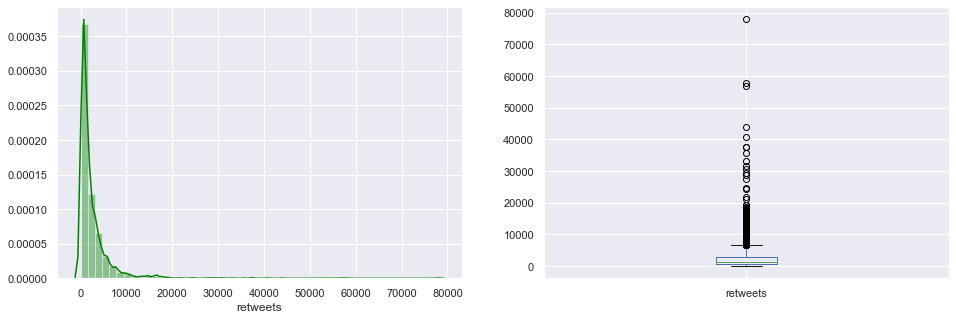

In [340]:
plt.figure(1)
plt.subplot(121)
sns.distplot(archive_clean['retweets'], color = 'green')


plt.subplot(122)
archive_clean['retweets'].plot.box(figsize=(16,5))

plt.show()

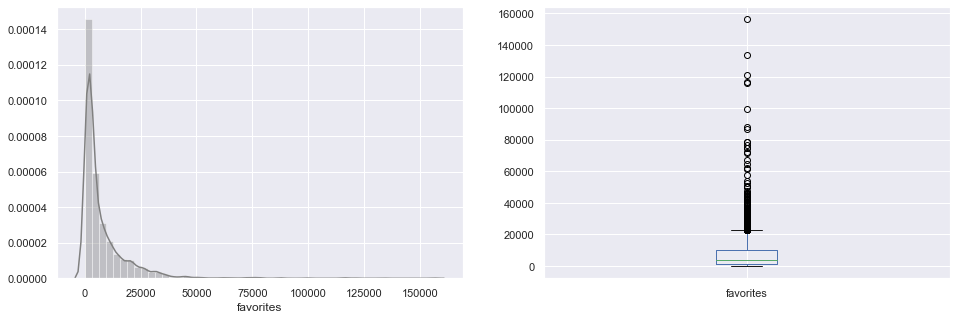

In [341]:
plt.figure(1)
plt.subplot(121)
sns.distplot(archive_clean['favorites'], color = 'grey')


plt.subplot(122)
archive_clean['favorites'].plot.box(figsize=(16,5))

plt.show()

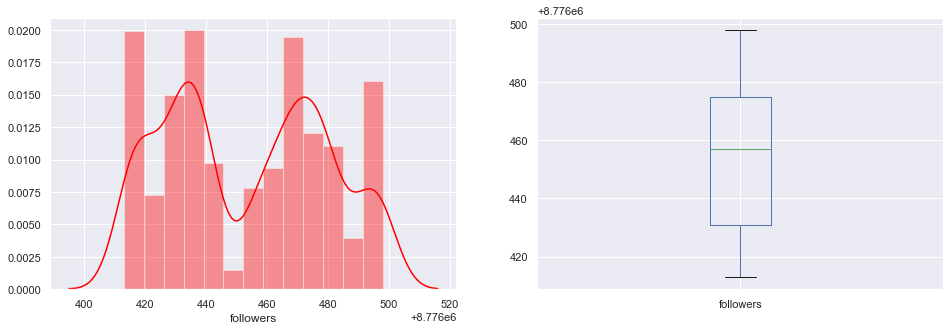

In [342]:
plt.figure(1)
plt.subplot(121)
sns.distplot(archive_clean['followers'], color = 'red')


plt.subplot(122)
archive_clean['followers'].plot.box(figsize=(16,5))

plt.show()

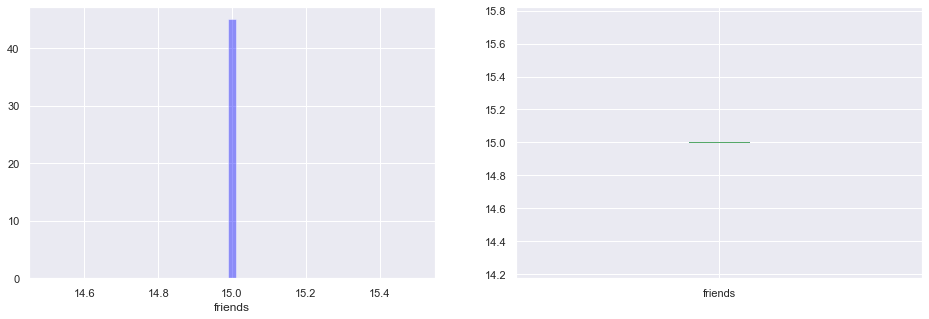

In [343]:
plt.figure(1)
plt.subplot(121)
sns.distplot(archive_clean['friends'], color = 'blue')


plt.subplot(122)
archive_clean['friends'].plot.box(figsize=(16,5))

plt.show()

### How confidence is the image prediction?

In [344]:
sns.set(rc={'figure.figsize':(11.7,8.27)})
def set_label(xlabel, ylabel):
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)

In [345]:
twitter_archives = pd.read_csv('twitter_archive_master.csv')

predictions_mappings = pd.read_csv('predictions_mapping_master.csv')

Text(0, 0.5, 'Confidence')

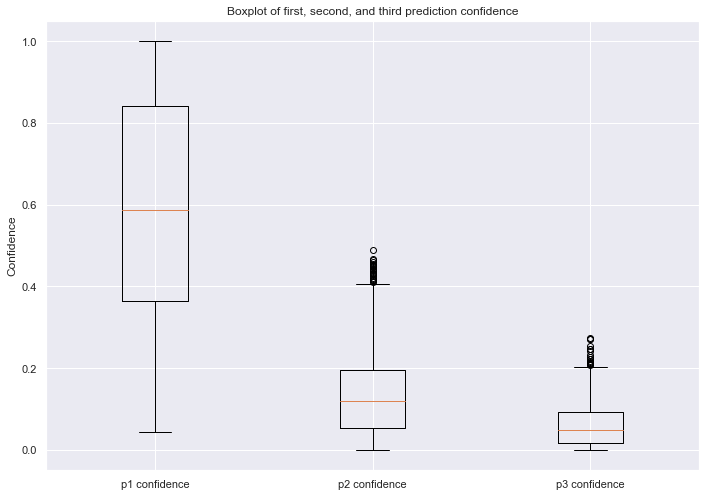

In [346]:
fig = plt.figure()
ax = fig.add_subplot(111)
plot = ax.boxplot([
    twitter_archives.p1_conf[twitter_archives.p1_conf.notnull()],
    twitter_archives.p2_conf[twitter_archives.p2_conf.notnull()],
    twitter_archives.p3_conf[twitter_archives.p3_conf.notnull()]], 
    labels=[
    'p1 confidence', 'p2 confidence', 'p3 confidence'])
plt.title('Boxplot of first, second, and third prediction confidence')
plt.ylabel('Confidence')


From the above, we can see that first prediction tend to have higher confidence than the second and third prediction. We can also see that for the first prediction, the more than 50% of the image has more than 50% confidence.

Doing log transformations for retweets, fav and followers only.

In [348]:
# Just capping the values to 1 for whichever values <=0
archive_clean['favorites_mod'] = archive_clean.favorites[archive_clean.favorites <= 0] = 1
archive_clean['retweets_mod'] = archive_clean.retweets[archive_clean.retweets <= 0] = 1

In [349]:
archive_clean.columns

Index(['tweet_id', 'in_reply_to_status_id', 'in_reply_to_user_id', 'timestamp',
       'source', 'text', 'retweeted_status_id', 'retweeted_status_user_id',
       'expanded_urls', 'rating_numerator', 'rating_denominator', 'name',
       'retweets', 'favorites', 'followers', 'friends', 'jpg_url', 'img_num',
       'p1', 'p1_conf', 'p1_dog', 'p2', 'p2_conf', 'p2_dog', 'p3', 'p3_conf',
       'p3_dog', 'dog_stage', 'favorites_mod', 'retweets_mod'],
      dtype='object')

Text(0.5, 0, 'Favorites - Count')

<Figure size 842.4x595.44 with 0 Axes>

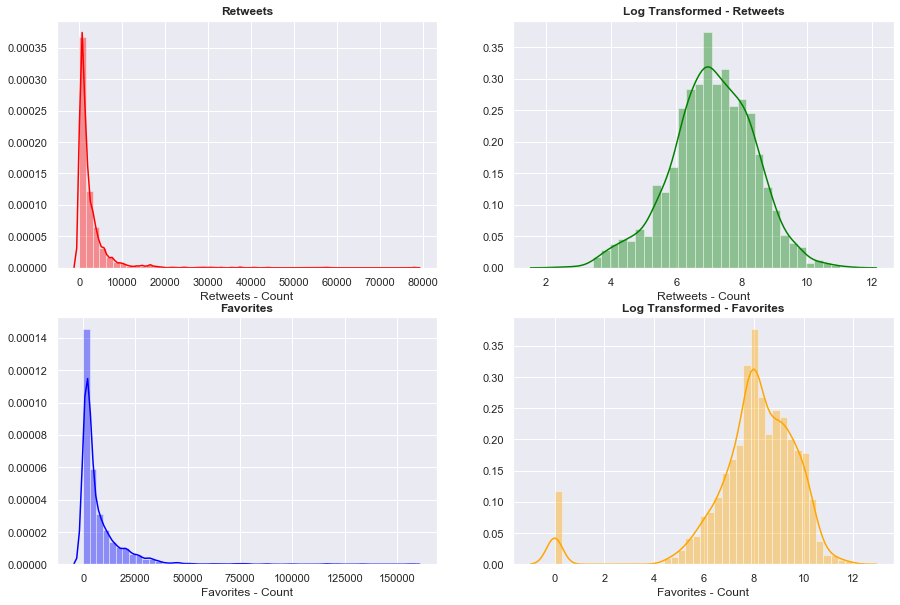

In [350]:
plt.figure(1)
plt.figure(figsize = (15,10))
plt.subplot(221)
sns.distplot(archive_clean.retweets, color = 'red')
plt.title('Retweets', fontweight="bold", fontsize = 12.0)
plt.xlabel('Retweets - Count', fontsize=12)

plt.subplot(222)
sns.distplot(archive_clean.retweets.apply(np.log), color = 'green')
plt.title('Log Transformed - Retweets', fontweight="bold", fontsize = 12.0)
plt.xlabel('Retweets - Count', fontsize=12)
                                                                    

plt.subplot(223)
sns.distplot(archive_clean.favorites, color = 'blue')
plt.title('Favorites', fontweight="bold", fontsize = 12.0)
plt.xlabel('Favorites - Count', fontsize=12)

plt.subplot(224)
sns.distplot(archive_clean.favorites.apply(np.log), color = 'orange')
plt.title('Log Transformed - Favorites', fontweight="bold", fontsize = 12.0)
plt.xlabel('Favorites - Count', fontsize=12)


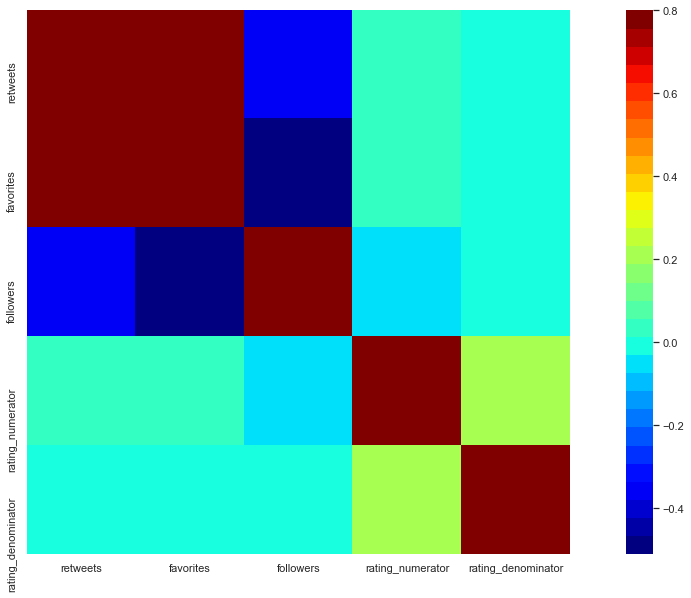

In [202]:
# Correlation between numerical variables
num_cols_data = (archive_clean[['retweets','favorites', 'followers', 'rating_numerator', 'rating_denominator' ]])
matrix = num_cols_data.corr()
f, ax = plt.subplots(figsize=(20, 10))
cm1 = cm.get_cmap('jet', 30)
sns.heatmap(matrix, vmax=.8, square=True, cmap=cm1);

* It seems like Retweets and Favorites are highly correlated.This shows that people who have retweeted have also done with favorites tag. Hence both the distributions shows similar behaviour

To confirm the above behavior, let us do a scatter plot between Retweet and Favorites

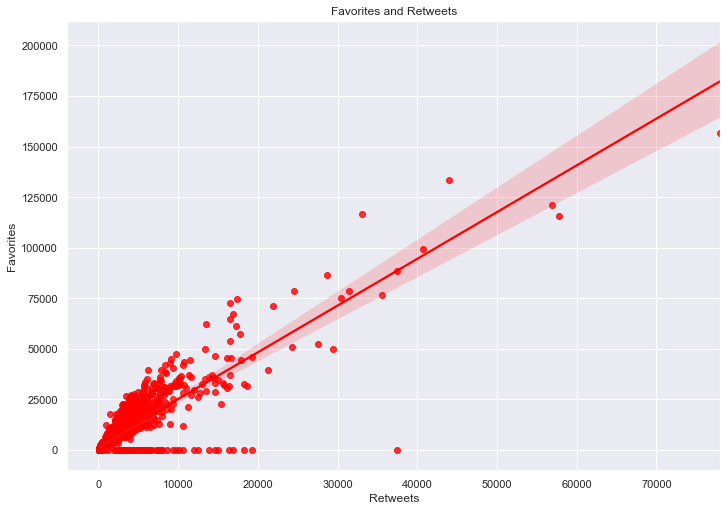

In [352]:
graph = sns.regplot(x=archive_clean.retweets, y=archive_clean.favorites,color='red')
plt.title("Favorites and Retweets")
plt.xlabel('Retweets')
plt.ylabel('Favorites')
# sns.plt.show()
fig = graph.get_figure()
fig.savefig('scatterplot.png')

Yes both the Retweets and Favorites go in sync together

Text(0, 0.5, 'Count %')

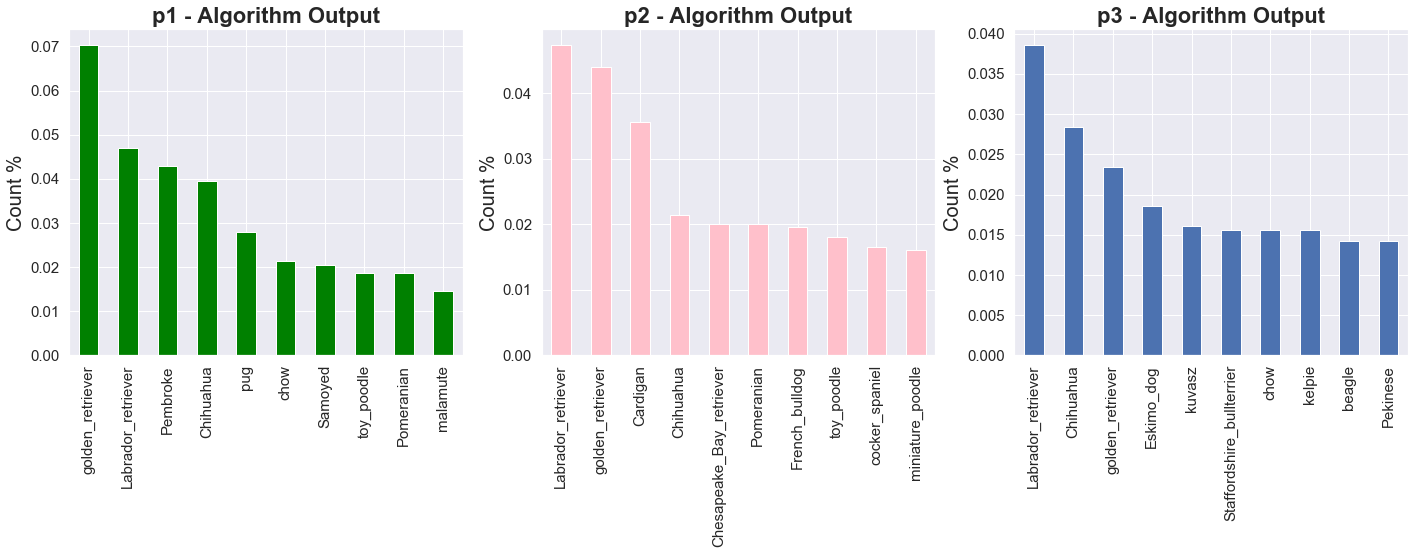

In [354]:
plt.figure(1)
plt.subplot(131)

archive_clean['p1'].value_counts(normalize=True).head(10).plot.bar(figsize=(24,6), fontsize = 15.0,color='green')
plt.title('p1 - Algorithm Output', fontweight="bold", fontsize = 22.0)
plt.ylabel('Count %', fontsize = 20.0)

plt.subplot(132)
archive_clean['p2'].value_counts(normalize=True).head(10).plot.bar(figsize=(24,6), fontsize = 15.0,color='pink')
plt.title('p2 - Algorithm Output', fontweight="bold", fontsize = 22.0)
plt.ylabel('Count %', fontsize = 20.0)

plt.subplot(133)
archive_clean['p3'].value_counts(normalize=True).head(10).plot.bar(figsize=(24,6), fontsize = 15.0)
plt.title('p3 - Algorithm Output', fontweight="bold", fontsize = 22.0)
plt.ylabel('Count %', fontsize = 20.0)



* Majority of the predictions by 3 algorithms is done for golden_retriever, Labrador_retriever and Chihuahua dogs

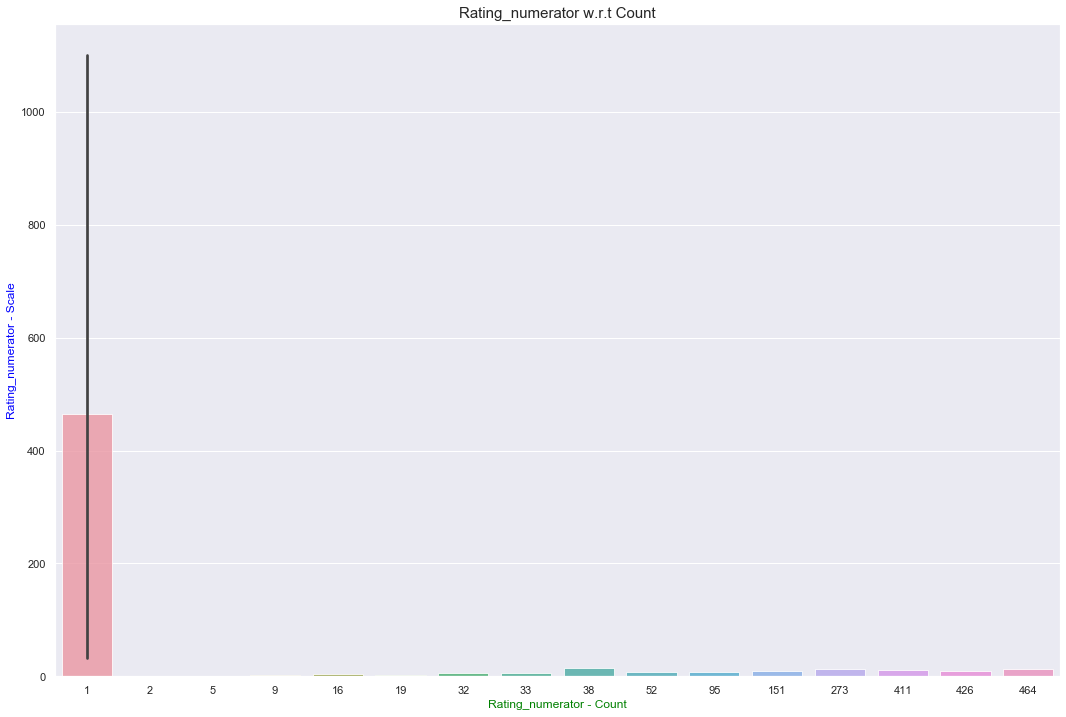

In [360]:
# Top rating_numerator values based on the count
cnt_srs = archive_clean['rating_numerator'].value_counts().head(20)
plt.figure(figsize=(18,12))
sns.barplot(y=cnt_srs.index, x=cnt_srs.values, alpha=0.8)
plt.xlabel('Rating_numerator - Count', fontsize=12,color='green')
plt.ylabel('Rating_numerator - Scale', fontsize=12,color='blue')
plt.title("Rating_numerator w.r.t Count", fontsize=15)
plt.show()

* Rating numerator have majority of the ratings around 10

In [361]:
archive_clean[archive_clean['rating_denominator'] < 10].shape

(2, 30)

In [362]:
archive_clean[archive_clean['rating_denominator'] > 10].shape

(16, 30)

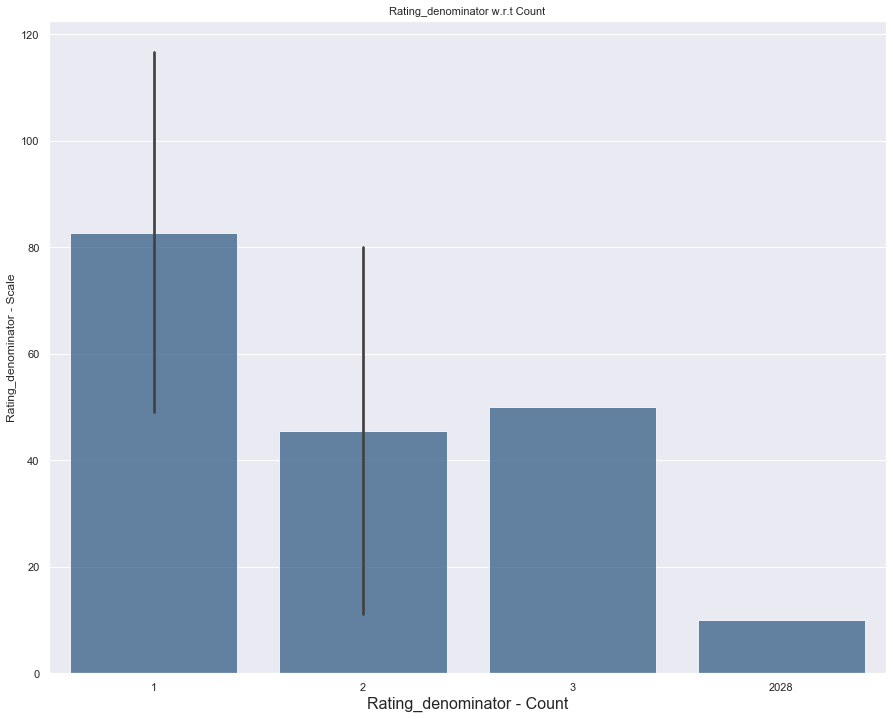

In [367]:
# Top rating_denominator values based on the count
cnt_srs = archive_clean['rating_denominator'].value_counts().head(30)
plt.figure(figsize=(15,12))
sns.barplot(y=cnt_srs.index, x=cnt_srs.values, alpha=0.8,color=(0.2, 0.4, 0.6, 0.6))
plt.xlabel('Rating_denominator - Count', fontsize=16)
plt.ylabel('Rating_denominator - Scale', fontsize=12)
plt.title("Rating_denominator w.r.t Count", fontsize=11)
plt.show()

Here rating must be with only 10 sometimes users with feel may rate less than and more than 10. <br>
We have total 16 records in total and all other tweets are rated on 10.<br>
2028 tweets have 10 rating.


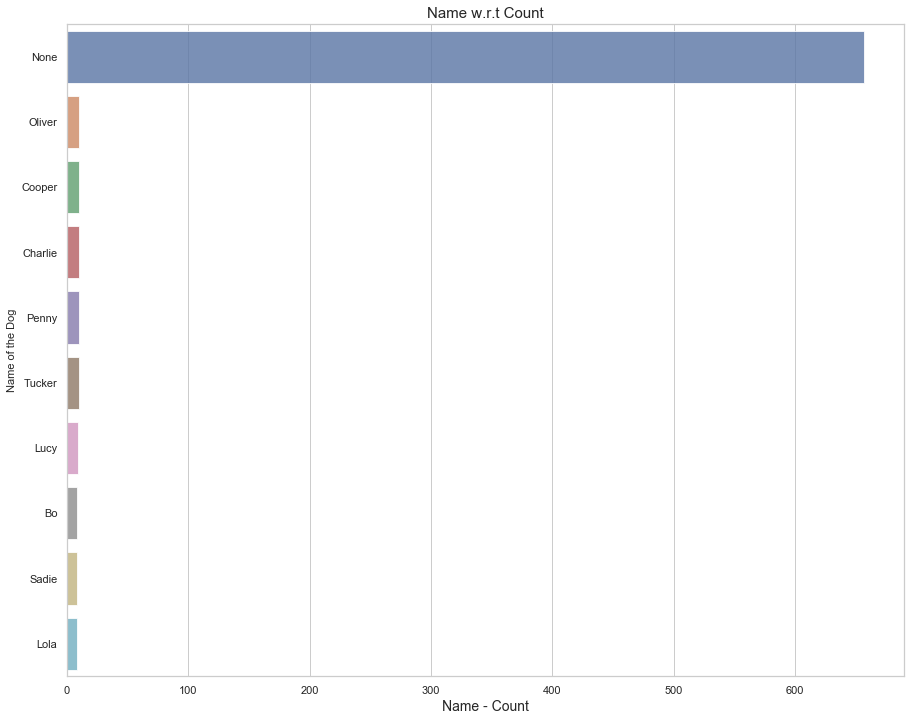

In [210]:
# Top dog name values based on the count
cnt_srs = archive_clean['name'].value_counts().head(10)
plt.figure(figsize=(15,12))
sns.barplot(y=cnt_srs.index, x=cnt_srs.values, alpha=0.8)
plt.xlabel('Name - Count', fontsize=14)
plt.ylabel('Name of the Dog', fontsize=11)
plt.title("Name w.r.t Count", fontsize=15)
plt.show()

* Majority of the Dog names are "None"

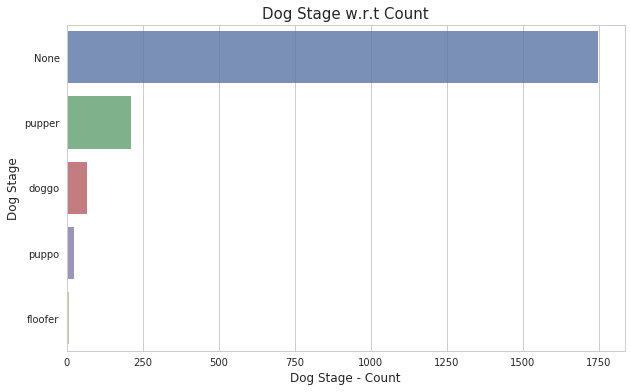

In [110]:
# Top Dog_stage values based on the count
cnt_srs = archive_clean['dog_stage'].value_counts().head(10)
plt.figure(figsize=(10,6))
sns.barplot(y=cnt_srs.index, x=cnt_srs.values, alpha=0.8)
plt.xlabel('Dog Stage - Count', fontsize=12)
plt.ylabel('Dog Stage', fontsize=12)
plt.title("Dog Stage w.r.t Count", fontsize=15)
plt.show()

Most of the tweets did not categorize the dog stages but after this the dogs are more count if compared to pupper.

In [377]:
from subprocess import call
call(['python', '-m', 'nbconvert', 'wrangle_act.ipynb'])

0